In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

In [3]:
MAX_SEQ = 256

In [4]:
train = pd.read_csv('data/sample_train.csv', header=None)
test = pd.read_csv('data/sample_test.csv', header=None)

# train_X = train.pos
# train_y = train[1:]

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,nat,9,19,32,1,20,37,1,17,6,...,0,0,0,0,0,0,0,0,0,0
1,neg,2,331,85,11,1,141,125,38,8,...,0,0,0,0,0,0,0,0,0,0
2,pos,20,37,17,5,1,231,9,1,24,...,0,0,0,0,0,0,0,0,0,0
3,neg,25,177,1,253,79,28,7,1,7,...,6,577,47,29,1,11,6,1,577,33
4,nat,103,151,1,108,42,1,94,6,13,...,0,0,0,0,0,0,0,0,0,0


In [6]:
label2cat = {
    'pos': [1, 0, 0],
    'neg': [0, 1, 0],
    'nat': [0, 0, 1]
}

def label_to_category(label):
    return label2cat[label]

train_X = train.iloc[:, 1:].to_numpy()
train_y = np.array([label2cat[x] for x in train[0].to_numpy()])
test_X = test.iloc[:, 1:].to_numpy()
test_y = np.array([label2cat[x] for x in test[0].to_numpy()])

In [57]:
train_y

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
model = tf.keras.models.model_from_json()

In [62]:
model = Sequential([
    Embedding(3000, 64, input_length=256),
    
    Conv1D(128, 7, activation='relu', padding='valid'),
    MaxPool1D(pool_size=3),
    Dropout(0.1),
    
    Conv1D(128, 7, activation='relu', padding='valid'),
    MaxPool1D(pool_size=3),
    Dropout(0.1),
    
    Conv1D(128, 3, activation='relu', padding='valid'),
    MaxPool1D(pool_size=3),
    Dropout(0.1),
    
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 256, 64)           192000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 128)          57472     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 83, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 83, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 77, 128)           114816    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 128)           0         
__________

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)
hist = model.fit(train_X, train_y, verbose=1, batch_size=256, epochs=30, validation_data=(test_X, test_y),
                callbacks=[es])

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 189541 samples, validate on 96945 samples
Epoch 1/30
189541/189541 [==============================] - 49s 260us/step - loss: 0.7602 - acc: 0.6679 - val_loss: 0.5540 - val_acc: 0.8028
Epoch 2/30
189541/189541 [==============================] - 46s 242us/step - loss: 0.4499 - acc: 0.8472 - val_loss: 0.3498 - val_acc: 0.8863
Epoch 3/30
189541/189541 [==============================] - 46s 240us/step - loss: 0.2924 - acc: 0.9060 - val_loss: 0.2434 - val_acc: 0.9198
Epoch 4/30
189541/189541 [==============================] - 46s 240us/step - loss: 0.2074 - acc: 0.9331 - val_loss: 0.1868 - val_acc: 0.9403
Epoch 5/30
189541/189541 [==============================] - 46s 240us/step - loss: 0.1664 - acc: 0.9459 - val_loss: 0.1944 - val_acc: 0.9374
Epoch 6/30
189541/189541 [==============================] - 45s 240us/step - loss: 0.1380 - acc: 0.9554 - val_loss: 0.1436 - val_acc: 0.9566
Epoch 7/30
189541/189541 [==============================] - 46s 241us/step - loss: 0.1172 - acc: 0.9620

In [64]:
model.evaluate(test_X, test_y)

96945/96945 [==============================] - 12s 123us/step


[0.07858159147805718, 0.9831657125174068]

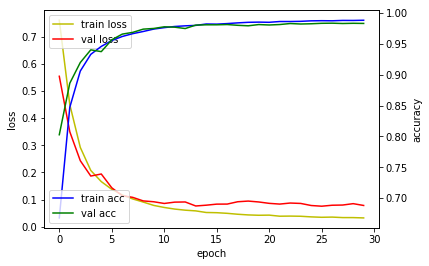

In [68]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [66]:
model_json = model.to_json()
with open("model/model.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("model/model.h5")
print("Saved model to disk")

Saved model to disk
